<a href="https://colab.research.google.com/github/HongJeongHwan/Data_Preprocessing/blob/main/%EC%8B%A4%EC%8A%B508_%EB%B6%93%EA%BD%83%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#§ 붓꽃 데이터 분석

##■ 데이터 불러오기

In [ ]:
# 드라이브 재연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# path에  custom module path 추기
import sys

path = '/content/drive/MyDrive/KDT/myexer/mod/'
sys.path.append(path)
# sys.path.remove(path)

In [ ]:
# sys.path
# %cd /content/drive/MyDrive/KDT/myexer
# # !pwd
# # !ls
# import mod
import UseNanumFont

SyntaxError: ignored

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터프레임 생성

# 파일경로 설정
file_path = '/content/drive/MyDrive/KDT/03. 정형데이터분석시각화/02. Data파일/iris_dataset.csv'

df_iris = pd.read_csv(file_path)
df_iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##■ 데이터 전처리

###→ 누락데이터 처리

In [ ]:
# 각 컬럼별 누락 데이터 확인
print(f'각 컬럼별 누락 데이터 확인 :\n{df_iris.isnull().sum()}\n')

각 컬럼별 누락 데이터 확인 :
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64



###→ 이상치 처리

In [ ]:
columns = df_iris.columns
print(f'{columns}')

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')


####└ sepal length 컬럼

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


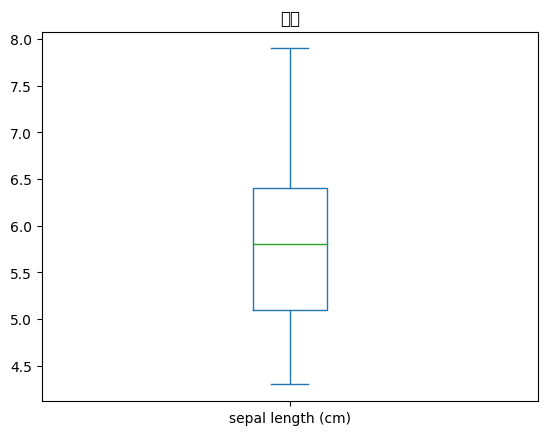

In [ ]:
# 이상치 확인 --> pandas.series.plot(kind=''box')
df_iris.loc[:,columns[0]].plot(kind='box')
plt.title('한글')
plt.show()

####└ sepal width 컬럼

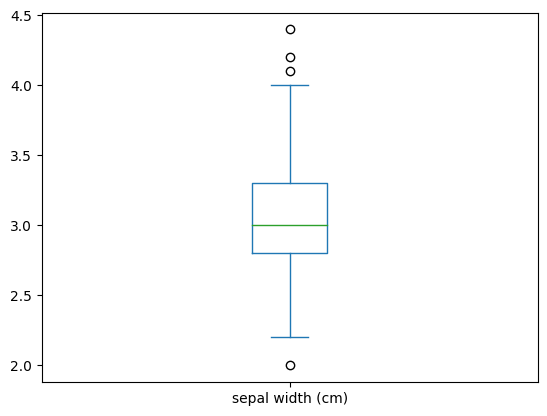

In [ ]:
# 이상치 확인 --> pandas.series.plot(kind=''box')
df_iris.loc[:,columns[1]].plot(kind='box')
plt.show()

In [ ]:
# sepal width 컬럼의 첫번째 이상치 데이터의 행 인덱스 추출
"""
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
"""
df_iris.describe()

# 1사분위 값 / 3사분위 값 추출
q1 = df_iris.loc[:,columns[1]].quantile(q=0.25)
q3 = df_iris.loc[:,columns[1]].quantile(q=0.75)
print(f'sepal width 컬럼의 첫번째 1사분위 값 : {q1}\n')
print(f'sepal width 컬럼의 첫번째 3사분위 값 : {q3}\n')

# IQR 추출
iqr = q3-q1
print(f'sepal width 컬럼의 첫번째 iqr : {iqr}\n')

# 정상범위의 최소값
min = q1-(iqr*1.5)
max = q3+(iqr*1.5)

print(f'sepal width 컬럼의 첫번째 정상범위의 최소값 : {min}\n')
print(f'sepal width 컬럼의 첫번째 정상범위의 최대값 : {max}\n')

# 이상치 데이터의 인덱스 추출
cond1 = (df_iris.loc[:,columns[1]] > max)
cond2 = (df_iris.loc[:,columns[1]] < min)
cond = cond1 | cond2

# df_iris.loc[:,columns[1]].loc[cond]
outlier_index = df_iris.loc[cond,columns[1]].index
print(f'sepal width 컬럼의 첫번째 이상치 데이터의 인덱스 : {outlier_index}\n')

# df.col.drop(index)
cleaned_sepal_width = df_iris.loc[:,columns[1]].drop(outlier_index)
print(f'{cleaned_sepal_width}')

sepal width 컬럼의 첫번째 1사분위 값 : 2.8

sepal width 컬럼의 첫번째 3사분위 값 : 3.3

sepal width 컬럼의 첫번째 iqr : 0.5

sepal width 컬럼의 첫번째 정상범위의 최소값 : 2.05

sepal width 컬럼의 첫번째 정상범위의 최대값 : 4.05

sepal width 컬럼의 첫번째 이상치 데이터의 인덱스 : Int64Index([15, 32, 33, 60], dtype='int64')

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 146, dtype: float64


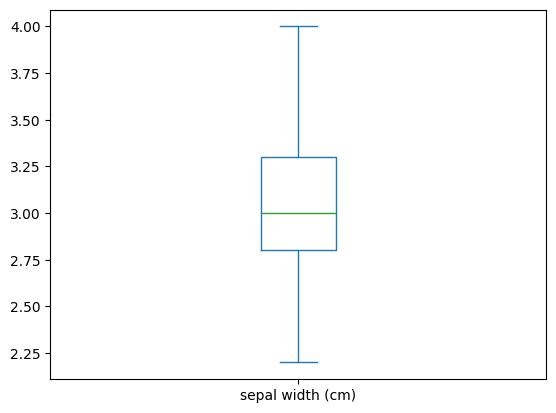

In [ ]:
# 두번째 이상치 확인
cleaned_sepal_width.plot(kind='box')
plt.show()

####└ petal length 컬럼

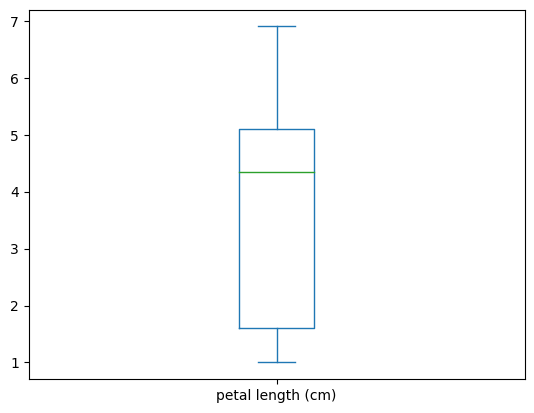

In [ ]:
# 첫번째 이상치 확인
df_iris.loc[:,columns[2]].plot(kind='box')
plt.show()

####└ petal width 컬럼

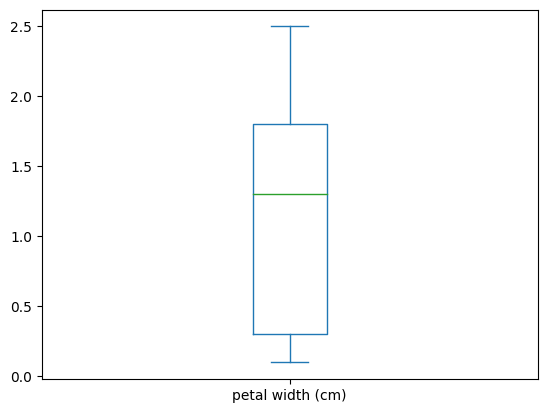

In [ ]:
# 첫번째 이상치 확인
df_iris.loc[:,columns[3]].plot(kind='box')
plt.show()

####└ concat()

In [ ]:
# 각 컬럼 병합 --> 데이터프레임 생성
df_concat = pd.concat([df_iris.loc[:,columns[0]],
                       cleaned_sepal_width,
                       df_iris.loc[:,columns[2]],
                       df_iris.loc[:,columns[3]],
                       df_iris.loc[:,columns[4]]],
                      join='inner',
                      axis=1)
print(df_concat)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         label  
0       se

In [ ]:
# 인덱스 재설정

df_concat.reset_index(drop=True,inplace=True)
print(df_concat)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
141                6.7               3.0                5.2               2.3   
142                6.3               2.5                5.0               1.9   
143                6.5               3.0                5.2               2.0   
144                6.2               3.4                5.4               2.3   
145                5.9               3.0                5.1               1.8   

         label  
0       se

##■ 데이터 탐색

###→ 불균형 데이터 여부 확인

붓꽃 품종의 품목별 개수 :
virginica     50
versicolor    49
setosa        47
Name: label, dtype: int64



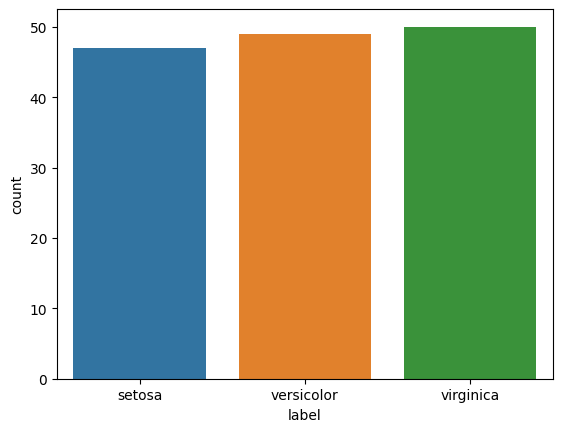

In [ ]:
# 붓꽃 품종의 종류별 개수 확인 : (정답의 분포 확인, 불균형 데이터인지 확인)

# 정답의 빈도수 추출 --> 범주형 컬럼의 항목별 개수 추출 --> value_counts()
# df_concat.label.value_counts()
counts = df_concat.loc[:,'label'].value_counts()
print(f'붓꽃 품종의 품목별 개수 :\n{counts}\n')

# 정답의 분포 시각화
sns.countplot(data=df_concat,x=df_concat.columns[-1])
plt.show()

###→ 각 컬럼이 품종분류에 적합 여부 확인

####└ sepal length 컬럼

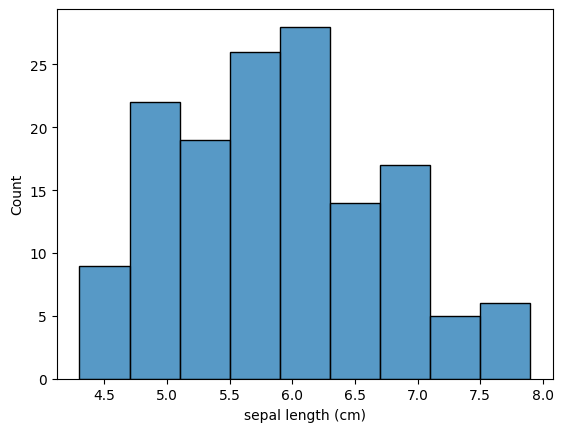

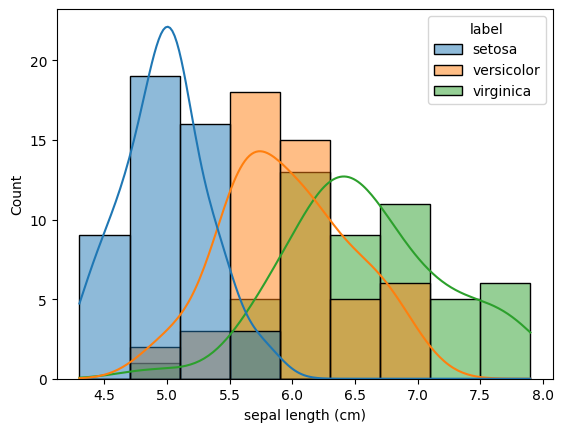

In [ ]:
# 컬럼별 품종간의 차이 시각화
# 각 컬럼(특성)별 품종간의 차이 시각화

# sepal length 컬럼 값 시각화 --> 연속형 데이터 --> sns.histplot(sns.kdeplot)
sns.histplot(data=df_concat, x=columns[0])
plt.show()

# hue='label' --> 추가 분석
sns.histplot(data=df_concat,x=columns[0],hue=columns[-1],kde=True)
plt.show()


이 데이터는 3품종의 분포가 확연한 차이가 없어서, 구분데이터로는 썩 적합하지 않다.

####└ sepal width 컬럼

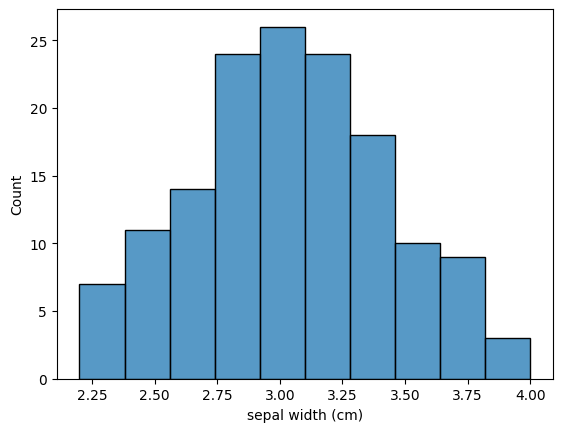

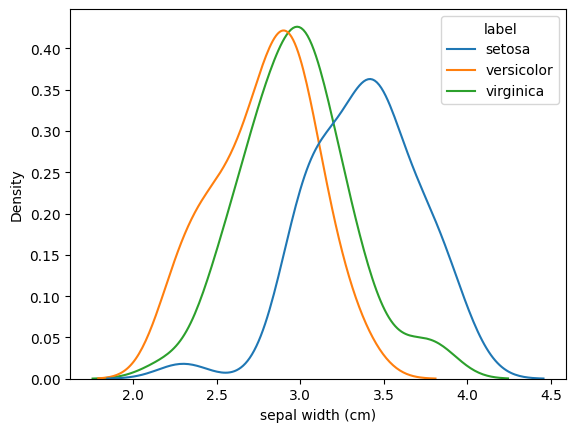

In [ ]:
# sepal width 컬럼 값 시각화 --> 연속형 데이터 --> sns.histplot(sns.kdeplot)
sns.histplot(data=df_concat, x=columns[1])
plt.show()

# hue='label' --> 추가 분석
sns.kdeplot(data=df_concat,x=columns[1],hue=columns[-1])
plt.show()

####└ pepal length 컬럼

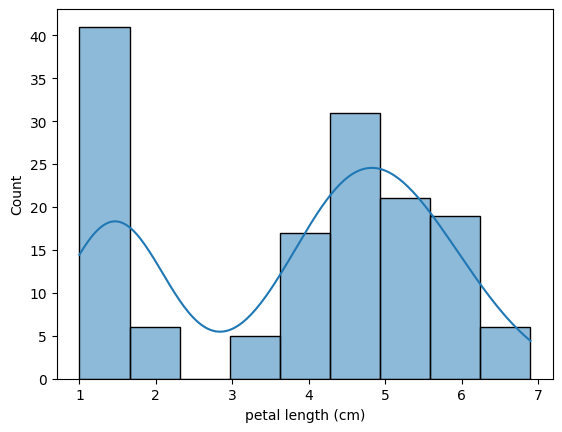

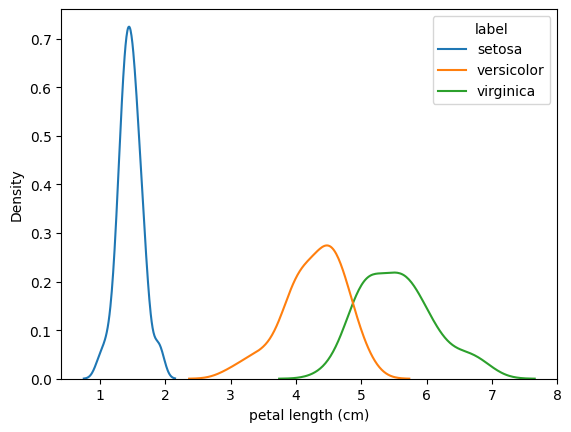

In [ ]:
# pepal length 컬럼 값 시각화 --> 연속형 데이터 --> sns.histplot(sns.kdeplot)
sns.histplot(data=df_concat, x=columns[2],kde=True)
plt.show()

# hue='label' --> 추가 분석
sns.kdeplot(data=df_concat,x=columns[2],hue=columns[-1])
plt.show()

####└ pepal width 컬럼

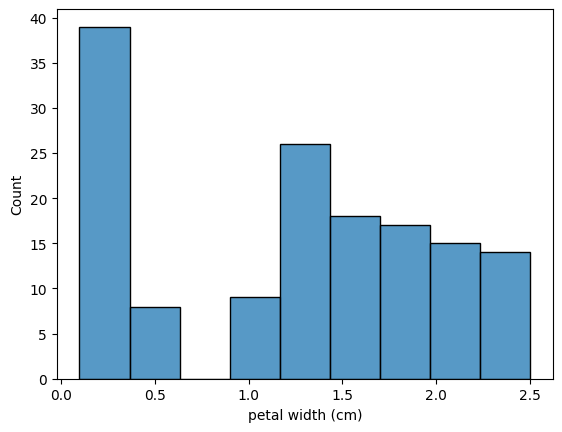

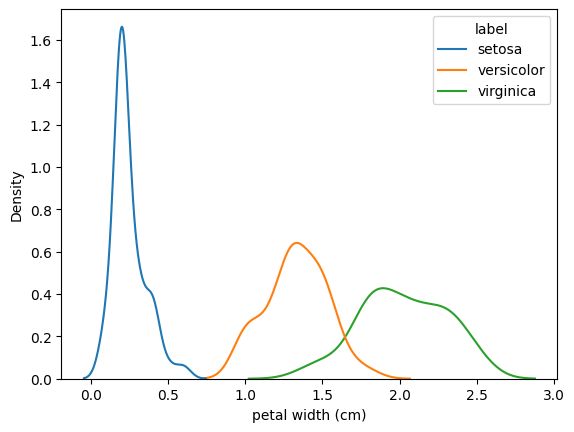

In [ ]:
# pepal width 컬럼 값 시각화 --> 연속형 데이터 --> sns.histplot(sns.kdeplot)
sns.histplot(data=df_concat, x=columns[3])
plt.show()

# hue='label' --> 추가 분석
sns.kdeplot(data=df_concat,x=columns[3],hue=columns[-1])
plt.show()

###→ 비교연산자를 이용한 품종분류

In [ ]:
# 꽃잎(petal)의 길이(length) --> 비교연산자 ==> 품종 분류

# 꽃잎의 길이 --> 요약 통계량 추출
cond1 = (df_concat.loc[:,columns[-1]] == 'setosa')
cond2 = (df_concat.loc[:,columns[-1]] == 'versicolor')
cond3 = (df_concat.loc[:,columns[-1]] == 'virginica')

# setosa 추출 --> 전체 데이터에서 품종이 setosa인 행 추출 --> loc인덱스+불리언 배열
stats1 = df_concat.loc[cond1,columns[2]].describe()
print(f'setosa 품종의 꽃잎의 길이에 대한 요약통계량 :\n{stats1}\n')

# 꽃잎의 길이 --> 비교연산자 적용
cond1 = (df_concat.loc[:,columns[2]] <= 1.90)

# 비교연산의 결과 --> loc인덱서+불리언인덱싱 --> 품종확인
df_concat.loc[cond1,columns[-1]].value_counts()



# stats2 = df_concat.loc[cond2,columns[2]].describe()
# print(f'versicolor 품종의 꽃잎의 길이에 대한 요약통계량 :\n{stats2}\n')

# stats3 = df_concat.loc[cond3,columns[2]].describe()
# print(f'virginica 품종의 꽃잎의 길이에 대한 요약통계량 :\n{stats3}\n')


setosa 품종의 꽃잎의 길이에 대한 요약통계량 :
count    47.000000
mean      1.461702
std       0.178829
min       1.000000
25%       1.400000
50%       1.500000
75%       1.600000
max       1.900000
Name: petal length (cm), dtype: float64



setosa    47
Name: label, dtype: int64